# Test postprocessing

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

In [2]:
import postproengine as ppeng	
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

In [6]:
yamlstring="""

instantaneousplanes:
  - name: smallXYplane
    ncfile: /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_77500.nc
    iters:  [-1]
    iplane: 1
    xaxis: x
    yaxis: y
    # --- optional stuff here ---
    #times: [28000, 28100, 28450]
    title: 'XY Horizontal velocity T={time:0.2f}'
    plotfunc: "lambda u, v, w: np.sqrt(u**2 + v**2)"    
    clevels: 'np.linspace(0, 12, 121)'
    xlabel: 'X [m]'
    ylabel: 'Y [m]'
  - name: FullXYplane
    ncfile: /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XYdomaincoarse_77500.nc
    iters:  [-1]
    iplane: 0
    xaxis: x
    yaxis: y
    # --- optional stuff here ---
    #times: [28000, 28100, 28450]
    title: 'XY Horizontal velocity T={time:0.2f}'
    plotfunc: "lambda u, v, w: np.sqrt(u**2 + v**2)"    
    clevels: 'np.linspace(0, 12, 121)'
    xlabel: 'X [m]'
    ylabel: 'Y [m]'

avgplanes:
  - name: avg_smallXYplane
    ncfile:
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_35000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_50000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_65000.nc    
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_77500.nc
    tavg: [17800, 18500]
    #savepklfile         : Name of pickle file to save results (Optional, Default: '')
    #group               : Which group to pull from netcdf file (Optional, Default: None)
    plot:
      plotfunc: 'lambda u, v, w: np.sqrt(u**2 + v**2)'
      title: 'AVG horizontal velocity'
      xaxis: x           # Which axis to use on the abscissa 
      yaxis: y           # Which axis to use on the ordinate 
      iplane: 1    
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized avgplanes
Running avgplanes
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_35000.nc 14
[============================================================] 100.0% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_50000.nc 597
[============================================================] 99.8% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_65000.nc 572
[============================================================] 99.8% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_77500.nc 220
[============================================================] 99.5% 
Ncount = 1400

Initialized plot inside avgplanes
Executing plot
Initialized inst

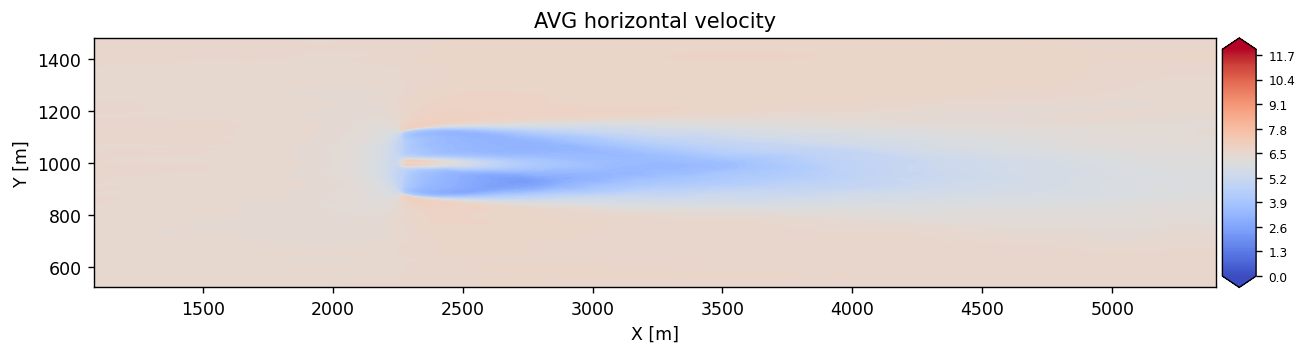

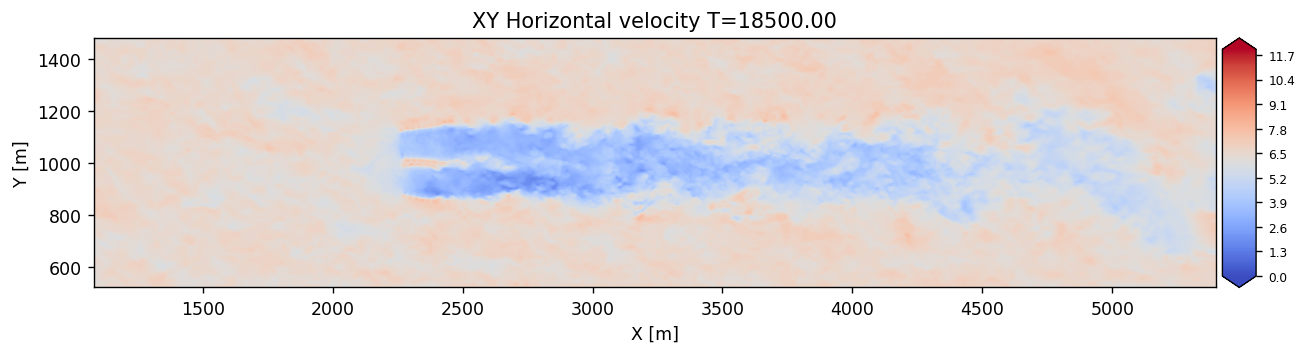

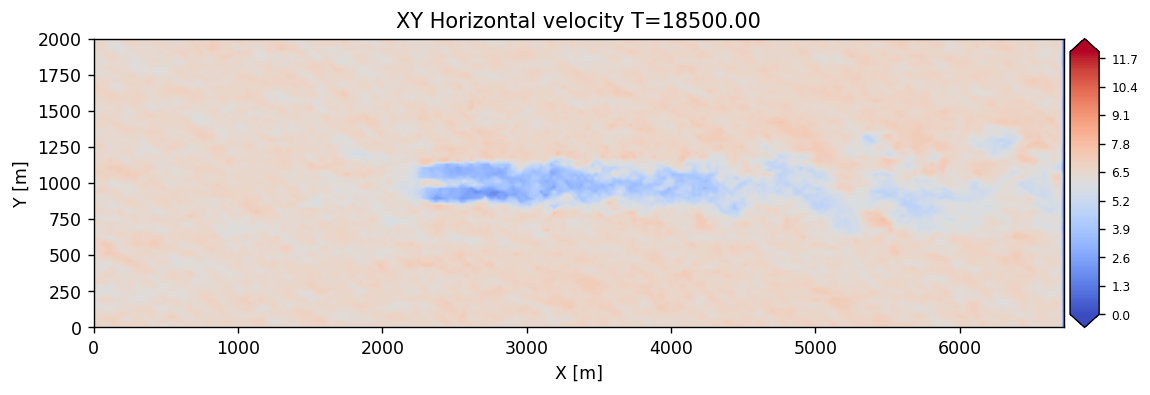

In [7]:
# Run the driver
ppeng.driver(yamldict, verbose=True)